**Importando todas as bibliotecas necessárias**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import csv
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from random import shuffle



**Significado dos Categoricos:**



**Status**

0 - Developing;  1 - Developed;


**Country**

1 - Afghanistan;
2 - Albania;
3 - Algeria;
...
173 - Yemen;   
174 - Zambia;  
175 - Zimbabwe;


**Carregando o Conjunto de Dados**

In [2]:
base = pd.read_csv("LifeExpectancyData_Alterada.csv")
#print(base)
#print(base.describe())
Name_LifeExpectancy = base.iloc[:,3].name
print(base[Name_LifeExpectancy].value_counts())
#separando cada atributo em um vetor separado
Country = base.iloc[:,0].values
Year = base.iloc[:,1].values
Status = base.iloc[:,2].values
LifeExpectancy = base.iloc[:,3].values
AdultMortality = base.iloc[:,4].values
InfantDeaths = base.iloc[:,5].values
Alcohol = base.iloc[:,6].values
Percentage_exependiture = base.iloc[:,7].values
HepatitisB = base.iloc[:,8].values
Measles = base.iloc[:,9].values
UnderFiveDeaths = base.iloc[:,10].values
Polio = base.iloc[:,11].values
TotalExpenditure = base.iloc[:,12].values
Diphtheria = base.iloc[:,13].values
AIDS = base.iloc[:,14].values
GDP = base.iloc[:,15].values
Population = base.iloc[:,16].values
thinness1_19 = base.iloc[:,17].values
thinness5_9 = base.iloc[:,18].values
Income_recources = base.iloc[:,19].values
Schooling = base.iloc[:,20].values


Life expectancy 
73.0    36
75.0    19
73.9    18
74.5    17
78.0    16
        ..
48.6     1
49.9     1
49.5     1
53.3     1
44.3     1
Name: count, Length: 319, dtype: int64


**Gerando os conjuntos de treino, teste e validação**

In [ ]:
RMSE_RLM = []
RMSE_KNR = []
RMSE_SVR = []
RMSE_RF = []
RMSE_GB = []
RMSE_MLP = []
MAE_RLM = []
MAE_KNR = []
MAE_SVR = []
MAE_RF = []
MAE_GB = []
MAE_MLP = []
MSE_RLM = []
MSE_KNR = []
MSE_SVR = []
MSE_RF = []
MSE_GB = []
MSE_MLP = []
score_RLM = []
score_KNR = []
score_SVR = []
score_RF = []
score_GB = []
score_MLP = []

NovaBase = pd.DataFrame(base, columns=[col for col in base.columns if col != Name_LifeExpectancy])
LifeExpectancy_series = pd.Series(LifeExpectancy)
counts = LifeExpectancy_series.value_counts()
print("Distribuição de LifeExpectancy:\n", counts)
for rep in range(20):
    print(rep)
    x_treino, x_temp, y_treino, y_temp = train_test_split(NovaBase, LifeExpectancy_series, test_size=0.5, random_state=10, shuffle=True)  # 50% para treino
    x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_temp, y_temp, test_size=0.50, random_state=10)  # 25% para validação e 25% para teste
    # Chamando funcao para cada metodo e armazenando acc de cada metodo

    RMSE, MAE, MSE, score = RLM()
    RMSE_RLM.append(RMSE)
    MAE_RLM.append(MAE)
    MSE_RLM.append(MSE)
    score_RLM.append(score)
    RMSE, MAE, MSE, score= KNR()
    RMSE_KNR.append(RMSE)
    MAE_KNR.append(MAE)
    MSE_KNR.append(MSE)
    score_KNR.append(score)
    RMSE, MAE, MSE, score = funcao_SVR()
    RMSE_SVR.append(RMSE)
    MAE_SVR.append(MAE)
    MSE_SVR.append(MSE)
    score_SVR.append(score)
    RMSE, MAE, MSE, score= RF()
    RMSE_RF.append(RMSE)
    MAE_RF.append(MAE)
    MSE_RF.append(MSE)
    score_RF.append(score)
    RMSE, MAE, MSE, score = GB()
    RMSE_GB.append(RMSE)
    MAE_GB.append(MAE)
    MSE_GB.append(MSE)
    score_GB.append(score)
    RMSE, MAE, MSE, score = MLP()
    RMSE_MLP.append(RMSE)
    MAE_MLP.append(MAE)
    MSE_MLP.append(MSE)
    score_MLP.append(score)



#RMSE
df_rmse = pd.DataFrame({
    'RLM': RMSE_RLM,
    'KNR': RMSE_KNR,
    'SVR': RMSE_SVR,
    'RF': RMSE_RF,
    'GB': RMSE_GB,
    'MLP': RMSE_MLP
})
df_rmse.to_csv('RMSE.csv', index=False)

# MAE
df_mae = pd.DataFrame({
    'RLM': MAE_RLM,
    'KNR': MAE_KNR,
    'SVR': MAE_SVR,
    'RF': MAE_RF,
    'GB': MAE_GB,
    'MLP': MAE_MLP
})
df_mae.to_csv('MAE.csv', index=False)

# MSE
df_mse = pd.DataFrame({
    'RLM': MSE_RLM,
    'KNR': MSE_KNR,
    'SVR': MSE_SVR,
    'RF': MSE_RF,
    'GB': MSE_GB,
    'MLP': MSE_MLP
})
df_mse.to_csv('MSE.csv', index=False)

# Score
df_score = pd.DataFrame({
    'RLM': score_RLM,
    'KNR': score_KNR,
    'SVR': score_SVR,
    'RF': score_RF,
    'GB': score_GB,
    'MLP': score_MLP
})
df_score.to_csv('Score.csv', index=False)


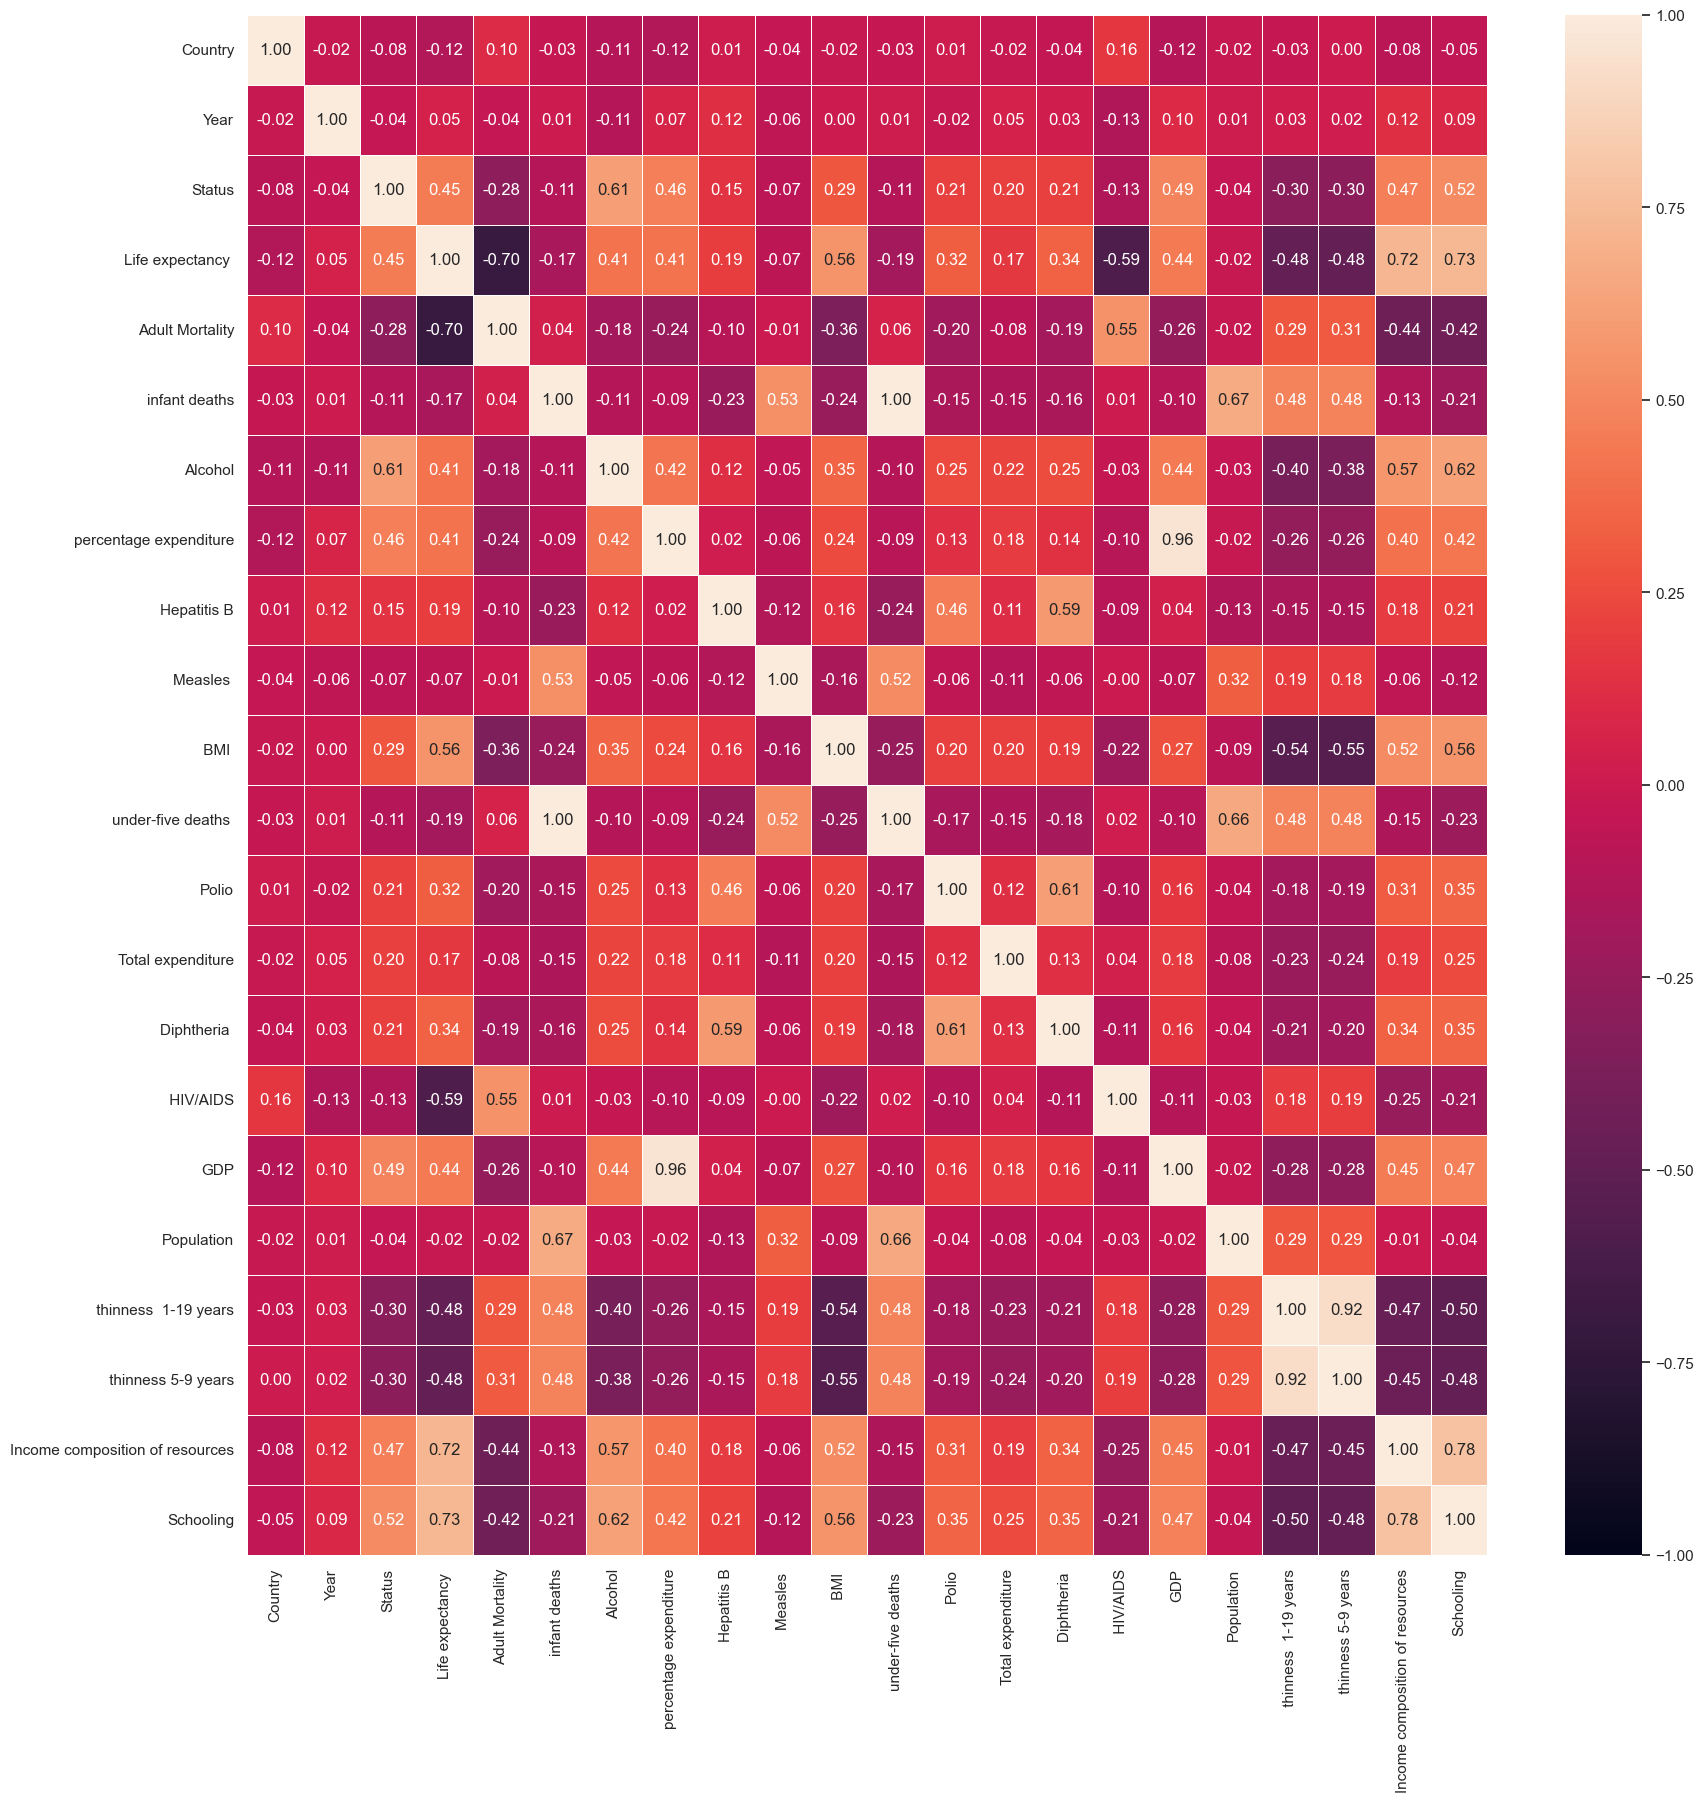

In [3]:
#analisando o relacionamento entre as variáveis
plt.figure(figsize=(20, 20))
sn.set(font_scale=1)
sn.heatmap(base.corr(),annot=True,vmin=-1, vmax=1,linewidth=.5,fmt=".2f");
plt.show()

**Regressao linear multipla**

In [4]:
#construindo um modelo de regressão
def RLM():
    Modelo = LinearRegression().fit(x_treino, y_treino)
    score = Modelo.score(x_teste,y_teste)
    predict = Modelo.predict(x_teste)
    RMSE =  mean_squared_error(y_teste,predict,squared=False)
    MSE =  mean_squared_error(y_teste,predict,squared=True)
    MAE = mean_absolute_error(y_teste,predict)
    
    return RMSE, MAE, MSE, score
                              


**KNR**

In [5]:
valores_KNR = []
def KNR():
    menor_RMSE = 1000000
    Melhor_n_neighbors = None
    Melhor_weights = None

    for i in range(5,16):
        for j in ['uniform', 'distance']:
            KNR = KNeighborsRegressor(n_neighbors=i,weights=j)
            KNR.fit(x_treino,y_treino)
            scoreKNN =KNR.score(x_treino,y_treino)
            predict = KNR.predict(x_validacao)
            RMSE =  mean_squared_error(y_validacao,predict,squared=False)
            if RMSE < menor_RMSE:
                menor_RMSE = RMSE
                Melhor_n_neighbors = i
                Melhor_weights = j


    KNR = KNeighborsRegressor(n_neighbors=Melhor_n_neighbors,weights=Melhor_weights)
    KNR.fit(x_treino,y_treino)

    score = KNR.score(x_teste,y_teste)
    predict = KNR.predict(x_teste)
    MSE= mean_squared_error(y_teste,predict,squared=True)
    MAE= mean_absolute_error(y_teste,predict)
    RMSE= mean_squared_error(y_teste,predict,squared=False)
    valores_KNR.append({'Melhor_n_neighbors': Melhor_n_neighbors,'Melhor_weights': Melhor_weights})

    return RMSE, MAE, MSE, score

**SVR**

In [6]:
valores_SVR = []
from sklearn.svm import SVR
def funcao_SVR():
    menor_RMSE = 1000000
    Melhor_Kernel = None
    Melhor_C = None

    for i in [ 'poly', 'rbf', 'sigmoid']:  
        for j in [1, 10, 100]:
            svr = SVR(kernel=i, C=j)
            svr.fit(x_treino,y_treino)
            SVR_score= svr.score(x_treino,y_treino)
            predict = svr.predict(x_validacao)
            RMSE = mean_squared_error(y_validacao,predict,squared=True)
            if RMSE < menor_RMSE:
                menor_RMSE = RMSE
                Melhor_Kernel = i
                Melhor_C = j

    svr = SVR(kernel=Melhor_Kernel, C=Melhor_C)
    svr.fit(x_treino,y_treino)
    print ("                      SVR")
    predict = svr.predict(x_teste)
    score = svr.score(x_teste,y_teste)
    MSE= mean_squared_error(y_teste,predict,squared=True)
    MAE= mean_absolute_error(y_teste,predict)
    RMSE= mean_squared_error(y_teste,predict,squared=False)
    valores_SVR.append({'Melhor_Kernel':Melhor_Kernel,'Melhor_C':Melhor_C})
    return RMSE, MAE, MSE, score

**MLP**

In [7]:
valores_MLP = []
def MLP():
    menor_RMSE = 1000000
    Melhor_hidden_layer_sizes = None
    Melhor_activation = None
    Melhor_max_iter = None
    Melhor_learning_rate_init= None

    for i in [(50,), (100,),(50, 50),(100, 100)]:  # Varia hidden_layer_sizes
        for j in ['identity', 'logistic', 'tanh', 'relu']:  # Varia activation
            for k in [200, 300, 500]:  # Varia max_iter
                for l in ['constant', 'invscaling', 'adaptive']:  # Varia learning_rate_init
                    MLP = MLPRegressor(hidden_layer_sizes=i , activation=j, solver='adam', alpha=0.0001, max_iter=k, learning_rate= l)
                    MLP.fit(x_treino,y_treino)
                    MLP_Score = MLP.score(x_treino,y_treino)
                    predict = MLP.predict(x_validacao)
                    RMSE = mean_squared_error(y_validacao,predict,squared=False)
                    if RMSE < menor_RMSE:
                        menor_RMSE = RMSE
                        Melhor_hidden_layer_sizes = i
                        Melhor_activation = j
                        Melhor_max_iter = k
                        Melhor_learning_rate_init= l


    MLP = MLPRegressor(hidden_layer_sizes=Melhor_hidden_layer_sizes , activation=Melhor_activation, solver='adam', alpha=0.0001, max_iter=Melhor_max_iter, learning_rate= Melhor_learning_rate_init)
    MLP.fit(x_treino,y_treino)
    print ("                      MLP")
    print ("\nTodas as variáveis sobre o conjunto de teste")
    print ("Coef. Det. sobre o teste: ",MLP.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
    predict = MLP.predict(x_teste)
    score = MLP.score(x_teste,y_teste)
    MSE= mean_squared_error(y_teste,predict,squared=True)
    MAE= mean_absolute_error(y_teste,predict)
    RMSE= mean_squared_error(y_teste,predict,squared=False)

    valores_MLP.append({'Melhor_hidden_layer_sizes': Melhor_hidden_layer_sizes,'Melhor_activation':Melhor_activation,'Melhor_max_iter':Melhor_max_iter,'Melhor_learning_rate_init':Melhor_learning_rate_init})
    return RMSE, MAE, MSE, score

**Random Forest**

In [8]:
valores_RF = []
def RF():
    menor_RMSE = 1000000
    Melhor_n_estimators = None
    Melhor_criterion = None
    Melhor_max_depth = None
    Melhor_min_samples_split = None
    Melhor_min_samples_leaf = None

    for i in [10, 50, 100]:  # Varia n_estimators
        for j in ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']:  # Varia criterion
            for k in [None, 10, 20]:  # Varia max_depth
                for l in [2, 5, 10]:  # Varia min_samples_split
                    for m in [1, 2, 4]:  # Varia min_samples_leaf
                        RFR = RandomForestRegressor(n_estimators=i, criterion=j, max_depth=k, min_samples_split=l, min_samples_leaf=m)
                        RFR.fit(x_treino,y_treino)
                        RFR_Score = RFR.score(x_treino,y_treino)
                        predict = RFR.predict(x_validacao)
                        RMSE = mean_squared_error(y_validacao,predict,squared=False)
                        if RMSE < menor_RMSE:
                            menor_RMSE = RMSE
                            Melhor_n_estimators = i
                            Melhor_criterion = j
                            Melhor_max_depth = k
                            Melhor_min_samples_split = l
                            Melhor_min_samples_leaf = m

    RFR = RandomForestRegressor(n_estimators=Melhor_n_estimators, criterion=Melhor_criterion, max_depth=Melhor_max_depth, min_samples_split=Melhor_min_samples_split, min_samples_leaf=Melhor_min_samples_leaf)
    RFR.fit(x_treino,y_treino)
    predict = RFR.predict(x_teste)
    score = RFR.score(x_teste,y_teste)
    MSE= mean_squared_error(y_teste,predict,squared=True)
    MAE= mean_absolute_error(y_teste,predict)
    RMSE= mean_squared_error(y_teste,predict,squared=False)
    valores_RF.append({'Melhor_n_estimators': Melhor_n_estimators,'Melhor_criterion':Melhor_criterion,'Melhor_max_depth':Melhor_max_depth,'Melhor_min_samples_split':Melhor_min_samples_split,'Melhor_min_samples_leaf':Melhor_min_samples_leaf})
    return RMSE, MAE, MSE, score


**Gradient Boosting**

In [9]:
valores_GB = []

def GB():
    menor_RMSE = 1000000
    Melhor_n_estimators = None
    Melhor_loss = None
    Melhor_max_depth = None
    Melhor_learning_rate = None
    Melhor_min_samples_split = None
    Melhor_min_samples_leaf = None

    for h in [10, 50, 100]:  # Varia n_estimators
        for i in ['squared_error', 'absolute_error', 'huber', 'quantile']:  # Varia loss
            for j in range(1, 4):
                for k in range(0, 4):
                    k = k / 10.0
                    for l in range(2, 4):
                        for m in range(1, 4):
                            GBR = GradientBoostingRegressor( n_estimators=h,learning_rate=k,max_depth=j,  min_samples_split=l, min_samples_leaf=m, loss=i ,random_state=10)
                            GBR.fit(x_treino,y_treino)
                            GBR_Score = GBR.score(x_treino,y_treino)
                            predict = GBR.predict(x_validacao)
                            RMSE = mean_squared_error(y_validacao,predict,squared=False)
                            if RMSE < menor_RMSE:
                                menor_RMSE = RMSE
                                Melhor_n_estimators = h
                                Melhor_loss = i
                                Melhor_max_depth = j
                                Melhor_learning_rate = k
                                Melhor_min_samples_split = l
                                Melhor_min_samples_leaf = m

    GBR = GradientBoostingRegressor( n_estimators=Melhor_n_estimators,learning_rate=Melhor_learning_rate,max_depth=Melhor_max_depth,  min_samples_split=Melhor_min_samples_split, min_samples_leaf=Melhor_min_samples_leaf, loss=Melhor_loss ,random_state=10)
    GBR.fit(x_treino,y_treino)
    print ("                 Gradient Boosting")
    print ("\nTodas as variáveis sobre o conjunto de teste")
    print ("Coef. Det. sobre o teste: ",GBR.score(x_teste,y_teste)) #obtendo o coeficiente de determinação do modelo
    predict = GBR.predict(x_teste)
    score = GBR.score(x_teste,y_teste)
    MSE= mean_squared_error(y_teste,predict,squared=True)
    MAE= mean_absolute_error(y_teste,predict)
    RMSE= mean_squared_error(y_teste,predict,squared=False)
    valores_GB.append({'Melhor_n_estimators': Melhor_n_estimators,'Melhor_loss':Melhor_loss, 'Melhor_max_depth':Melhor_max_depth,'Melhor_min_samples_split':Melhor_min_samples_split,'Melhor_min_samples_leaf':Melhor_min_samples_leaf,'Melhor_learning_rate':Melhor_learning_rate})
    return RMSE, MAE, MSE, score

Armazenando todas as informações em arquivos CSV, para analise posterior

In [16]:
import csv

def save_to_csv(data, filename, header=None):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        if header:
            writer.writerow(header)
        # Converte cada dicionário em uma lista de valores
        for row in data:
            writer.writerow(row.values())

save_to_csv(valores_KNR, 'KNR.csv', header=['Melhor_n_neighbors', 'Melhor_weights'])
save_to_csv(valores_SVR, 'SVR.csv', header=['Melhor_Kernel', 'Melhor_C'])
save_to_csv(valores_MLP, 'MLP.csv', header=['Melhor_hidden_layer_sizes', 'Melhor_activation', 'Melhor_max_iter', 'Melhor_learning_rate_init'])
save_to_csv(valores_RF, 'RF.csv', header=['Melhor_n_estimators', 'Melhor_criterion', 'Melhor_max_depth', 'Melhor_min_samples_split', 'Melhor_min_samples_leaf'])
save_to_csv(valores_GB, 'GB.csv', header=['Melhor_n_estimators', 'Melhor_loss', 'Melhor_max_depth', 'Melhor_min_samples_split', 'Melhor_min_samples_leaf', 'Melhor_learning_rate'])

**Kruskal-Wallis e Mann-Whitney**

In [17]:
from scipy.stats import kruskal, mannwhitneyu
# Kruskal-Wallis
print ("Calculando estatisticas de Kruskal-Wallis \n\n")
Estatistica_Kruskal, pvalue = kruskal(RMSE_RLM, RMSE_KNR, RMSE_SVR, RMSE_RF, RMSE_GB,RMSE_MLP)
print("Estatística de Kruskal-Wallis :" ,Estatistica_Kruskal)
print("Significancia: " , pvalue)

# Se for menor que 0.05 é calculado o Mann-Whitney
if pvalue < 0.05:
    print("Rejeitamos a H0. Há uma diferença significativa entre os metodos. \n")

    #Mann-Whitney
    print("Metodos: RLM vs KNR")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_RLM, RMSE_KNR, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_RLM) < np.mean(RMSE_KNR):
            print("O RLM é superior ao KNR\n")
        else:
            print("O KNR é superior ao RLM\n")

    print("Metodos: RLM vs SVR")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_RLM, RMSE_SVR, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_RLM) < np.mean(RMSE_SVR):
            print("O RLM é superior ao SVR\n")
        else:
            print("O SVR é superior ao RLM\n")

    print("Metodos: RLM vs RF")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_RLM, RMSE_RF, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_RLM) < np.mean(RMSE_RF):
            print("O RLM é superior ao RF\n")
        else:
            print("O RF é superior ao RLM\n")

    print("Metodos: RLM vs GB")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_RLM, RMSE_GB, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_RLM) < np.mean(RMSE_GB):
            print("O RLM é superior ao GB\n")
        else:
            print("O GB é superior ao RLM\n")

    print("Metodos: RLM vs MLP")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_RLM, RMSE_MLP, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_RLM) < np.mean(RMSE_MLP):
            print("O RLM é superior ao MLP\n")
        else:
            print("O MLP é superior ao RLM\n")

    # Comparação entre KNR e outros métodos
    print("Metodos: KNR vs SVR")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_KNR, RMSE_SVR, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_KNR) < np.mean(RMSE_SVR):
            print("O KNR é superior ao SVR\n")
        else:
            print("O SVR é superior ao KNR\n")

    print("Metodos: KNR vs RF")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_KNR, RMSE_RF, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_KNR) < np.mean(RMSE_RF):
            print("O KNR é superior ao RF\n")
        else:
            print("O RF é superior ao KNR\n")

    print("Metodos: KNR vs GB")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_KNR, RMSE_GB, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_KNR) < np.mean(RMSE_GB):
            print("O KNR é superior ao GB\n")
        else:
            print("O GB é superior ao KNR\n")

    print("Metodos: KNR vs MLP")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_KNR, RMSE_MLP, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_KNR) < np.mean(RMSE_MLP):
            print("O KNR é superior ao MLP\n")
        else:
            print("O MLP é superior ao KNR\n")

    # Comparação entre SVR e outros métodos
    print("Metodos: SVR vs RF")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_SVR, RMSE_RF, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_SVR) < np.mean(RMSE_RF):
            print("O SVR é superior ao RF\n")
        else:
            print("O RF é superior ao SVR\n")

    print("Metodos: SVR vs GB")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_SVR, RMSE_GB, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_SVR) < np.mean(RMSE_GB):
            print("O SVR é superior ao GB\n")
        else:
            print("O GB é superior ao SVR\n")

    print("Metodos: SVR vs MLP")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_SVR, RMSE_MLP, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_SVR) < np.mean(RMSE_MLP):
            print("O SVR é superior ao MLP\n")
        else:
            print("O MLP é superior ao SVR\n")

    # Comparação entre RF e outros métodos
    print("Metodos: RF vs GB")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_RF, RMSE_GB, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_RF) < np.mean(RMSE_GB):
            print("O RF é superior ao GB\n")
        else:
            print("O GB é superior ao RF\n")

    print("Metodos: RF vs MLP")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_RF, RMSE_MLP, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_RF) < np.mean(RMSE_MLP):
            print("O RF é superior ao MLP\n")
        else:
            print("O MLP é superior ao RF\n")

    # Comparação entre GB e MLP
    print("Metodos: GB vs MLP")
    Estatistica_Mann, pvalue = mannwhitneyu(RMSE_GB, RMSE_MLP, alternative='two-sided')
    print(f"Estatística de Mann-Whitney: {Estatistica_Mann}, Significância: {pvalue}")
    if pvalue < 0.05:
        if np.mean(RMSE_GB) < np.mean(RMSE_MLP):
            print("O GB é superior ao MLP\n")
        else:
            print("O MLP é superior ao GB\n")


else:
    print("Rejeitamos H1. Não há diferença significativa entre os grupos. \n")


Calculando estatisticas de Kruskal-Wallis 


Estatística de Kruskal-Wallis : 117.8801386825161
Significancia:  8.82343855756763e-24
Rejeitamos a H0. Há uma diferença significativa entre os metodos. 

Metodos: RLM vs KNR
Estatística de Mann-Whitney: 0.0, Significância: 4.682682358742056e-10
O RLM é superior ao KNR

Metodos: RLM vs SVR
Estatística de Mann-Whitney: 0.0, Significância: 4.682682358742056e-10
O RLM é superior ao SVR

Metodos: RLM vs RF
Estatística de Mann-Whitney: 400.0, Significância: 8.006545033944714e-09
O RF é superior ao RLM

Metodos: RLM vs GB
Estatística de Mann-Whitney: 400.0, Significância: 4.682682358742056e-10
O GB é superior ao RLM

Metodos: RLM vs MLP
Estatística de Mann-Whitney: 0.0, Significância: 8.006545033944714e-09
O RLM é superior ao MLP

Metodos: KNR vs SVR
Estatística de Mann-Whitney: 0.0, Significância: 4.682682358742056e-10
O KNR é superior ao SVR

Metodos: KNR vs RF
Estatística de Mann-Whitney: 400.0, Significância: 8.006545033944714e-09
O RF é super